In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import mido

In [2]:
base_dir = os.getcwd()
data_dir = os.path.join(base_dir, '..', 'data')
clean_midi_dir = os.path.join(data_dir, 'clean_midi')

artist_folders = [f for f in os.listdir(clean_midi_dir) if os.path.isdir(os.path.join(clean_midi_dir, f))]

selected_files = []
while len(selected_files) < 10:
    artist_folder = random.choice(artist_folders)
    artist_folder_path = os.path.join(clean_midi_dir, artist_folder)
    song_files = [f for f in os.listdir(artist_folder_path) if f.endswith('.mid')]
    
    if not song_files:
        continue

    song_file = random.choice(song_files)
    midi_file_path = os.path.join(artist_folder_path, song_file)
    
    if midi_file_path not in selected_files:
        selected_files.append(midi_file_path) 

In [3]:
def extract_midi_properties(midi_file_path):
    midi = mido.MidiFile(midi_file_path)
    properties = {
        'file': os.path.basename(midi_file_path),
        'length': midi.length,
        'tracks': len(midi.tracks),
        'ticks_per_beat': midi.ticks_per_beat
    }
    return properties

for midi_file in selected_files[:10]:
    properties = extract_midi_properties(midi_file)
    print(f"File: {properties['file']}")
    print(f"  Length: {properties['length']} seconds")
    print(f"  Number of Tracks: {properties['tracks']}")
    print(f"  Ticks per Beat: {properties['ticks_per_beat']}")
    print("-" * 40) 

File: Hot Rod Lincoln.mid
  Length: 164.22400000000388 seconds
  Number of Tracks: 6
  Ticks per Beat: 120
----------------------------------------
File: Mother -In-Law.mid
  Length: 158.76632000000444 seconds
  Number of Tracks: 12
  Ticks per Beat: 384
----------------------------------------
File: Short People.mid
  Length: 174.35913999999596 seconds
  Number of Tracks: 8
  Ticks per Beat: 120
----------------------------------------
File: Isle of Capri.mid
  Length: 140.37543999999448 seconds
  Number of Tracks: 10
  Ticks per Beat: 384
----------------------------------------
File: Never My Love.1.mid
  Length: 200.73243655208233 seconds
  Number of Tracks: 1
  Ticks per Beat: 96
----------------------------------------
File: Have a Nice Day.mid
  Length: 192.9999999999995 seconds
  Number of Tracks: 30
  Ticks per Beat: 480
----------------------------------------
File: Baby Come Back.mid
  Length: 256.5723496499933 seconds
  Number of Tracks: 1
  Ticks per Beat: 120
------------

In [4]:
def extract_note_events(midi_file_path):
    midi = mido.MidiFile(midi_file_path)
    note_events = []
    for track in midi.tracks:
        for msg in track:
            if msg.type == 'note_on' or msg.type == 'note_off':
                note_events.append({
                    'time': msg.time,
                    'note': msg.note,
                    'velocity': msg.velocity,
                    'type': msg.type
                })
    return note_events

for midi_file in selected_files[:10]:
    note_events = extract_note_events(midi_file)
    print(f"File: {os.path.basename(midi_file)}")
    print(f"  Total Note Events: {len(note_events)}")
    for event in note_events[:5]:
        print(f"    Time: {event['time']} | Note: {event['note']} | Velocity: {event['velocity']} | Type: {event['type']}")
    print("-" * 40)

File: Hot Rod Lincoln.mid
  Total Note Events: 7816
    Time: 1496 | Note: 33 | Velocity: 113 | Type: note_on
    Time: 95 | Note: 33 | Velocity: 0 | Type: note_on
    Time: 25 | Note: 28 | Velocity: 98 | Type: note_on
    Time: 105 | Note: 28 | Velocity: 0 | Type: note_on
    Time: 15 | Note: 33 | Velocity: 102 | Type: note_on
----------------------------------------
File: Mother -In-Law.mid
  Total Note Events: 7700
    Time: 2676 | Note: 55 | Velocity: 90 | Type: note_on
    Time: 0 | Note: 58 | Velocity: 72 | Type: note_on
    Time: 0 | Note: 63 | Velocity: 71 | Type: note_on
    Time: 12 | Note: 63 | Velocity: 64 | Type: note_off
    Time: 4 | Note: 58 | Velocity: 64 | Type: note_off
----------------------------------------
File: Short People.mid
  Total Note Events: 9298
    Time: 480 | Note: 57 | Velocity: 100 | Type: note_on
    Time: 0 | Note: 61 | Velocity: 100 | Type: note_on
    Time: 0 | Note: 69 | Velocity: 100 | Type: note_on
    Time: 0 | Note: 33 | Velocity: 100 | Type

In [5]:
def get_unique_notes(midi_file_path):
    midi = mido.MidiFile(midi_file_path)
    notes = set()
    for track in midi.tracks:
        for msg in track:
            if msg.type == 'note_on' or msg.type == 'note_off':
                notes.add(msg.note)
    return notes

unique_notes = set()

for midi_file in selected_files[:10]:
    notes = get_unique_notes(midi_file)
    unique_notes.update(notes)

print(f"Total unique notes across 10 songs: {len(unique_notes)}")
print(f"Unique notes: {sorted(unique_notes)}") 

Total unique notes across 10 songs: 80
Unique notes: [18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 98, 114, 126]


In [6]:
def get_note_durations(midi_file_path):
    midi = mido.MidiFile(midi_file_path)
    note_durations = []
    for track in midi.tracks:
        for msg in track:
            if msg.type == 'note_on' or msg.type == 'note_off':
                note_durations.append(msg.time)
    return note_durations

all_durations = []

for midi_file in selected_files[:10]:
    durations = get_note_durations(midi_file)
    all_durations.extend(durations)

duration_mean = np.mean(all_durations)
duration_std = np.std(all_durations)

print(f"Mean note duration: {duration_mean}")
print(f"Standard deviation of note durations: {duration_std}") 

Mean note duration: 64.00517579460988
Standard deviation of note durations: 640.8634077746453


In [7]:
def get_time_signature(midi_file_path):
    midi = mido.MidiFile(midi_file_path)
    time_signatures = []
    for track in midi.tracks:
        for msg in track:
            if msg.type == 'time_signature':
                time_signatures.append(msg)
    return time_signatures

time_signatures = []

for midi_file in selected_files[:10]:
    ts = get_time_signature(midi_file)
    time_signatures.extend(ts)

unique_time_signatures = set([(ts.numerator, ts.denominator) for ts in time_signatures])

print(f"Unique time signatures found: {unique_time_signatures}") 

Unique time signatures found: {(4, 4)}


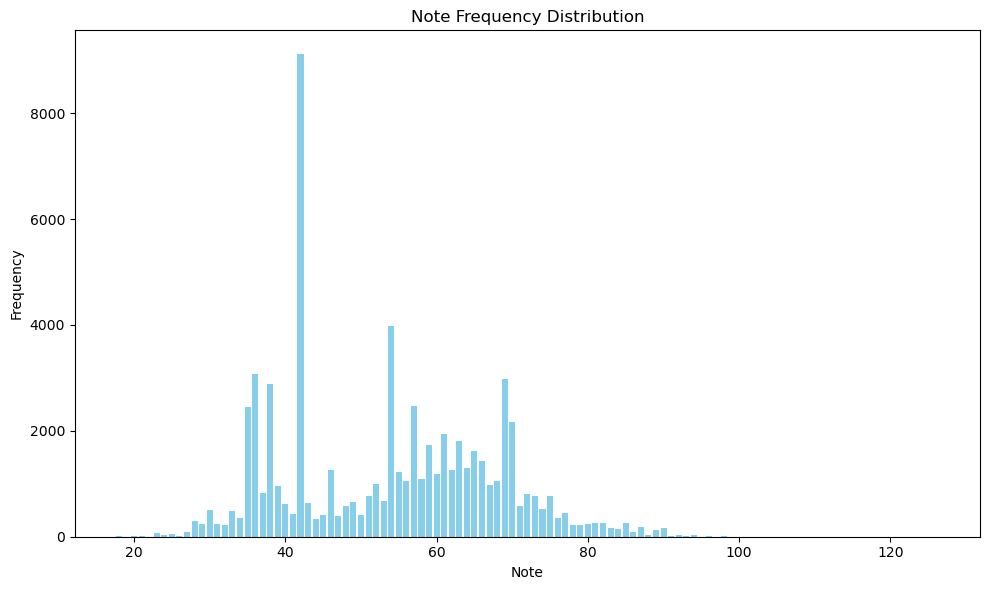

In [8]:
def get_note_counts(midi_file_path):
    midi = mido.MidiFile(midi_file_path)
    note_counts = {}
    for track in midi.tracks:
        for msg in track:
            if msg.type == 'note_on':
                note = msg.note
                if note not in note_counts:
                    note_counts[note] = 0
                note_counts[note] += 1
    return note_counts

note_counts = {}

for midi_file in selected_files[:10]:
    file_note_counts = get_note_counts(midi_file)
    for note, count in file_note_counts.items():
        if note not in note_counts:
            note_counts[note] = 0
        note_counts[note] += count

note_counts = dict(sorted(note_counts.items()))

plt.figure(figsize=(10, 6))
plt.bar(note_counts.keys(), note_counts.values(), color='skyblue')
plt.xlabel('Note')
plt.ylabel('Frequency')
plt.title('Note Frequency Distribution')
plt.tight_layout()
plt.show() 

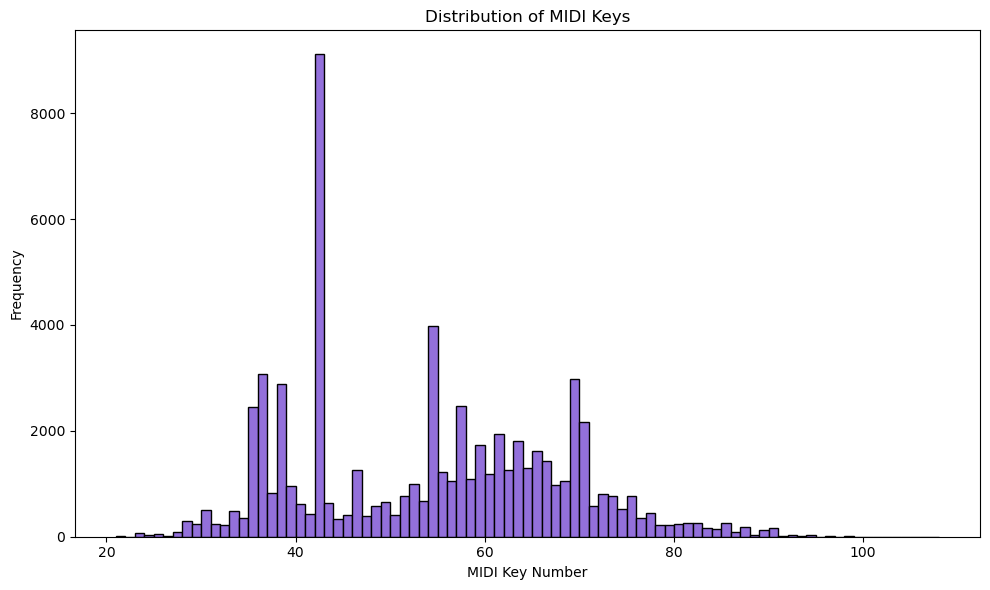

In [9]:
def get_midi_keys(midi_file_path):
    midi = mido.MidiFile(midi_file_path)
    keys = []
    for track in midi.tracks:
        for msg in track:
            if msg.type == 'note_on':
                key = msg.note
                keys.append(key)
    return keys

all_keys = []

for midi_file in selected_files[:10]:
    file_keys = get_midi_keys(midi_file)
    all_keys.extend(file_keys)

plt.figure(figsize=(10, 6))
plt.hist(all_keys, bins=range(21, 109), color='mediumpurple', edgecolor='black')
plt.xlabel('MIDI Key Number')
plt.ylabel('Frequency')
plt.title('Distribution of MIDI Keys')
plt.tight_layout()
plt.show() 

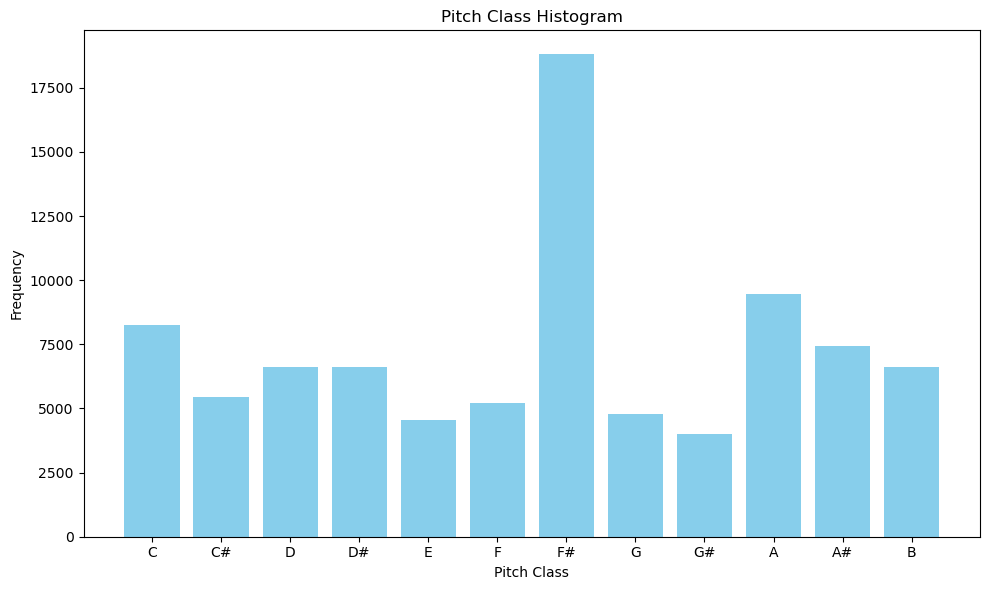

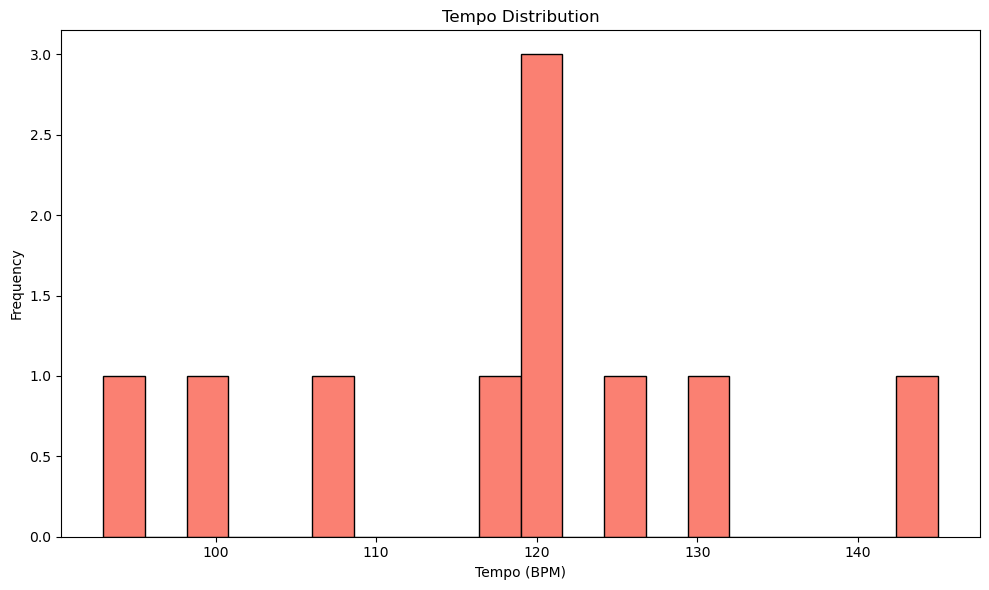

In [10]:
pitch_classes = []

for midi_file in selected_files:
    midi_data = mido.MidiFile(midi_file)
    for track in midi_data.tracks:
        for msg in track:
            if msg.type == 'note_on' or msg.type == 'note_off':
                pitch = msg.note
                pitch_class = pitch % 12
                pitch_classes.append(pitch_class)

pitch_class_counts = np.bincount(pitch_classes, minlength=12)

plt.figure(figsize=(10, 6))
plt.bar(range(12), pitch_class_counts, color='skyblue')
plt.xticks(range(12), ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.xlabel('Pitch Class')
plt.ylabel('Frequency')
plt.title('Pitch Class Histogram')
plt.tight_layout()
plt.show()

tempos = []

for midi_file in selected_files:
    midi_data = mido.MidiFile(midi_file)
    for track in midi_data.tracks:
        for msg in track:
            if msg.type == 'set_tempo':
                bpm = mido.tempo2bpm(msg.tempo)
                tempos.append(bpm)

plt.figure(figsize=(10, 6))
plt.hist(tempos, bins=20, color='salmon', edgecolor='black')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Frequency')
plt.title('Tempo Distribution')
plt.tight_layout()
plt.show() 